In [1]:
from utils import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

### Carregando o Dataset

In [2]:
df = pd.read_csv('../data/raw_data/data.csv')

### Verificando valores NaN

In [3]:
# Verificando quais colunas possuem valores NaN
nan_train = df.isnull().sum()
nan_train = nan_train[nan_train > 0]

print(nan_train)

Series([], dtype: int64)


### Separando os Dados

In [4]:
# Alterando Variável Indoor para 0 ou 1
df['indoor'] = df['indoor'].apply(lambda val: 1 if val == True else 0)

In [5]:
df_indoor = df[df['indoor'] == 1]
df_outdoor = df[df['indoor'] == 0]

In [6]:
df_train, df_val, df_test = split_and_balance(df_indoor, df_outdoor)

#### Plotando distribuição dos usuários no conjunto de treino

In [7]:
def plot_distribution_comp(df):
    colors = df['indoor'].map({1: 'red', 0: 'blue'})

    plt.scatter(df['lat'], df['lon'], c=colors, alpha=0.3, edgecolors='w', linewidth=0.5)
    plt.title('Latitude vs Longitude - Indoor')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.grid(True)

    plt.xlim(-8.06, -8.046)
    plt.ylim(-34.9605, -34.944)

    plt.show()

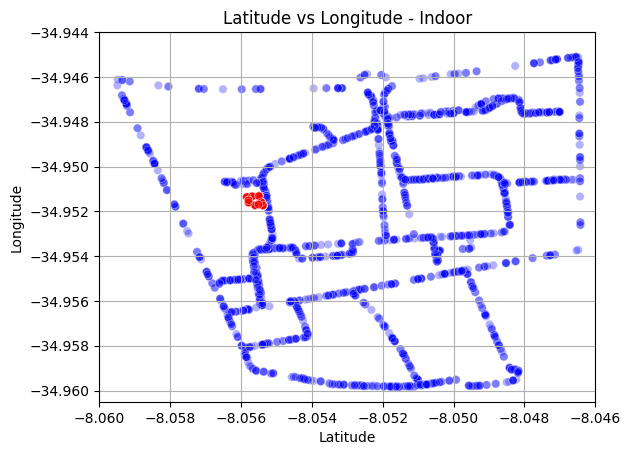

In [8]:
plot_distribution_comp(df_train)

In [10]:
map = plot_folium_map(df_indoor[['lat', 'lon']].values, df_outdoor[['lat', 'lon']].values, False, 'Outdoor', 'Indoor')
map

### Normalizando os dados

In [ ]:
columns_to_normalize = [
    'rssi_1_1', 'rssi_1_2', 'rssi_1_3',
    'rssi_2_1', 'rssi_2_2', 'rssi_2_3',
    'rssi_3_1', 'rssi_3_2', 'rssi_3_3',
    'delay_1', 'delay_2', 'delay_3'
]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df_train[columns_to_normalize])

In [ ]:
df_train[columns_to_normalize] = scaler.transform(df_train[columns_to_normalize])
df_val[columns_to_normalize] = scaler.transform(df_val[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])

In [ ]:
df_train = pd.DataFrame(df_train)
df_val = pd.DataFrame(df_val)
df_test = pd.DataFrame(df_test)

In [ ]:
df_train.head()

### Salvando os conjuntos

In [ ]:
df_train.to_csv('../data/treated_data/train.csv', index=False)
df_val.to_csv('../data/treated_data/validation.csv', index=False)
df_test.to_csv('../data/treated_data/test.csv', index=False)